No handles with labels found to put in legend.


[[136.30175  25.65   ]
 [193.21975  26.11875]
 [144.9675   25.2215 ]
 [ 97.451    26.021  ]
 [106.6455   25.5855 ]
 [ 72.388    25.8065 ]
 [103.52025  26.098  ]
 [179.12     27.1215 ]
 [180.38925  26.0795 ]
 [ 94.336    27.1755 ]
 [ 54.053    26.8305 ]
 [111.72175  26.146  ]
 [118.11425  26.6965 ]
 [179.095    27.7445 ]
 [196.17625  26.65125]
 [114.071    27.739  ]
 [ 70.57     27.4215 ]
 [120.29     26.86775]
 [ 27.54325  25.8835 ]
 [ 27.98275  26.48725]
 [ 27.05275  25.7025 ]
 [ 27.41675  26.17225]
 [ 27.526    25.72525]
 [ 27.5295   25.926  ]
 [272.06075  27.135  ]
 [127.73925  27.38975]
 [ 83.3615   27.13825]
 [127.64125  26.61425]
 [124.157    26.4665 ]
 [149.607    27.17725]
 [134.83175  26.3195 ]
 [ 82.008    26.967  ]
 [ 64.5885   26.53475]
 [ 77.98775  26.44575]
 [180.02725  26.96925]
 [154.02675  25.9895 ]
 [ 79.99175  26.981  ]
 [ 67.747    26.5915 ]
 [ 87.827    26.314  ]
 [364.8825   25.05825]
 [341.718    25.01975]
 [285.2135   24.569  ]
 [121.5985   26.78125]
 [210.78875

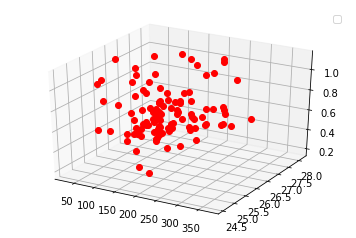

In [4]:
# import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

spreadsheet = pd.ExcelFile('Dataset/dataset.xlsx')
df2 = spreadsheet.parse('Sheet1')
df2.head()

ar = []
ar2d = []

x_list=[]
z_list=[]
i=0
y_list=[]
for row in df2.itertuples():
    if row[5]=='Bajra':
        ar.append(row[8])
        x_list.append(row[8])
        ar.append(row[9])
        z_list.append(row[9])
        y_list.append(row[10])
        ar2d.append(ar)
        ar = []
    i=i+1
nar2d = np.array(ar2d)
ny = np.array(y_list)


X_train = nar2d[:-1]
X_test = nar2d[-1:]

y_train = ny[:-1]
y_test = ny[-1:]

print(X_train)
print(X_test)
print(y_train)
print(y_test)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print("this is y pred : ")
print(y_pred)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x_list, z_list, y_list,'ro')
ax.legend()

plt.show()
